### nearest neighbors

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd
import math
import time

from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.backends.backend_pdf import PdfPages

In [1]:
def add_noise(A, length):
    A = np.asarray([[i + random.uniform(-length/20, length/20) for i in array ] for array in A])
    return A
    
def generate_cube_space(dimention, n_points, length, threshold, noise):
    A = np.array([[random.uniform(0, length) for j in range(n_points)] for i in range(dimention)])
    a0 = threshold
    a = np.random.rand(dimention - 1)
    for a_i in a:
        a0 -= threshold * a_i    
    f = lambda x: np.sum(x * a) + a0
    z = [ 1 if f(x[:-1]) > x[-1] else 0 for x in A.T]
    if noise:
        A = add_noise(A, length)
    return A, z
 

In [2]:
def generate_checkerboard_space(size, n_points, length, noise):
    size = math.sqrt(size)
    A = np.array([[random.uniform(0, length) for j in range(n_points)] for i in range(2)])
    z = [0 if (math.ceil(x*size/length)+math.ceil(y*size/length))%2 == 0 else 1 for x, y in zip(A[0], A[1])]

    if noise:
        A = add_noise(A, length*0.5)
    return A, z

In [3]:
def classify(A, z, n_neigh, algorithm_type, leaf):
    X_train, X_test, y_train, y_test = train_test_split(A.T, z, test_size=0.5, train_size=0.5)
    if leaf != 'none':
        neigh = KNeighborsClassifier(n_neighbors=n_neigh, algorithm = algorithm_type, leaf_size=leaf)
    else:
        neigh = KNeighborsClassifier(n_neighbors=n_neigh, algorithm = algorithm_type)
    neigh.fit(X_train, y_train)
    start = time.time()
    y_pred = neigh.predict(X_test)
    time_pred = time.time() - start
    score = neigh.score(X_test, y_test)
    
    return y_pred, score, time_pred

In [4]:
def df_to_pdf(df, name):
    fig, ax =plt.subplots(figsize=(12,4))
    ax.axis('tight')
    ax.axis('off')
    the_table = ax.table(cellText=df.values,colLabels=df.columns,loc='center')
    pp = PdfPages(name + ".pdf")
    pp.savefig(fig, bbox_inches='tight')
    pp.close()

In [5]:
threshold = 0.5

data_cube = {'algorithm': [], 'k neighbors': [], 'n points': [], 'dimention': [], 'length': [], 'noise': [], 'score': [], 'time pred': [], 'leaf size': []}  
df_cube = pd.DataFrame(data_cube)  
for noise in [True, False]:
    for dimention in [2, 3, 6, 10]:
        for length in [10, 100]:
            for algorithm in ['ball_tree', 'kd_tree', 'brute']:
                for points in [1500, 3000]:
                    for neigh in [3, 7, 21, 51]:
                        A, z = generate_cube_space(dimention, points, length, threshold, noise)
                        if algorithm == 'kd_tree':
                            for leaf in [1, 5]:
                                y_pred, score, time_pred = classify(A, z, neigh, algorithm, leaf)
                                df_cube = df_cube.append({'algorithm': algorithm, 'k neighbors': neigh, 'n points': points, 'dimention': dimention, 'length': length, 'noise': noise, 'score': score, 'time pred': time_pred, 'leaf size': leaf}  
, ignore_index=True)
                        else:
                            y_pred, score, time_pred = classify(A, z, neigh, algorithm, 'none')
                            df_cube = df_cube.append({'algorithm': algorithm, 'k neighbors': neigh, 'n points': points, 'dimention': dimention, 'length': length, 'noise': noise, 'score': score, 'time pred': time_pred, 'leaf size': 'none'}  
, ignore_index=True)

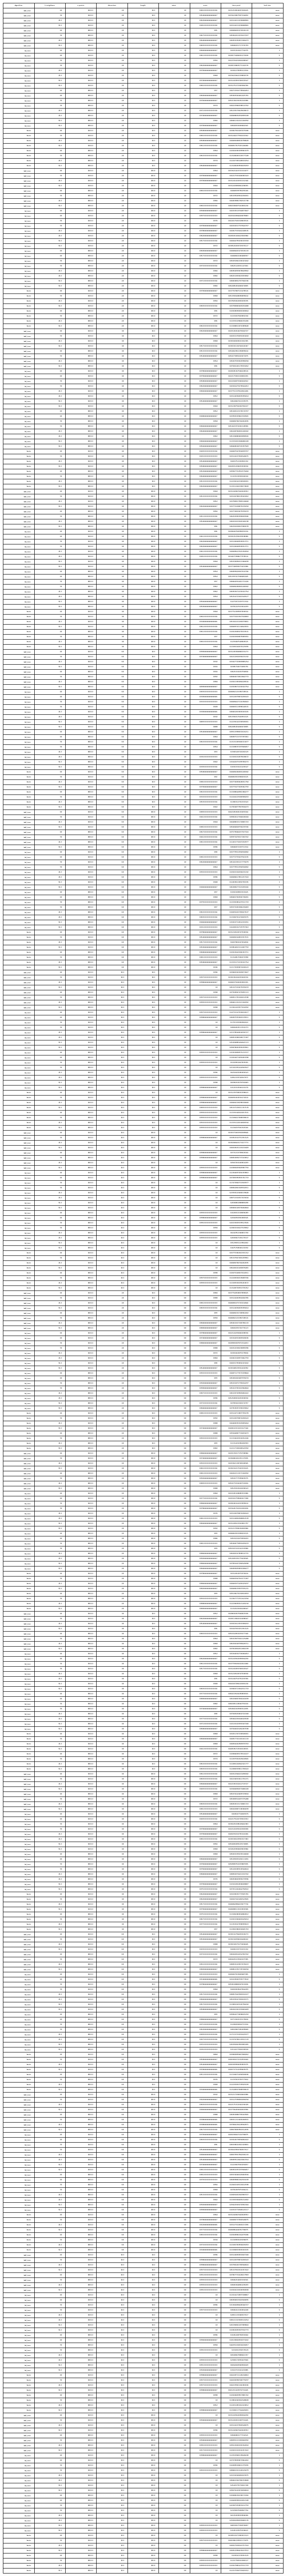

In [6]:
df_to_pdf(df_cube, "df_cube")

In [7]:
data_checkerboard = {'algorithm': [], 'k neighbors': [], 'n points': [], 'size': [], 'length': [], 'noise': [], 'score': [], 'time pred': [], 'leaf size': []}  
df_checkerboard = pd.DataFrame(data_checkerboard)  

for noise in [True, False]:
    for size in [4, 9, 16, 25]:
        for length in [10, 100]:
            for algorithm in ['ball_tree', 'kd_tree', 'brute']:
                for points in [1500, 3000]:
                    for neigh in [3, 7, 21, 51]:
                        A, z = generate_checkerboard_space(size, points, length, noise)
                        if algorithm == 'kd_tree':
                            for leaf in [1, 5]:
                                y_pred, score, time_pred = classify(A, z, neigh, algorithm, leaf)
                                df_checkerboard = df_checkerboard.append({'algorithm': algorithm, 'k neighbors': neigh, 'n points': points, 'size': size, 'length': length, 'noise': noise, 'score': score, 'time pred': time_pred, 'leaf size': leaf}  
, ignore_index=True)
                        else:
                            y_pred, score, time_pred = classify(A, z, neigh, algorithm, 'none')
                            df_checkerboard = df_checkerboard.append({'algorithm': algorithm, 'k neighbors': neigh, 'n points': points, 'size': size, 'length': length, 'noise': noise, 'score': score, 'time pred': time_pred, 'leaf size': 'none'}  
, ignore_index=True)

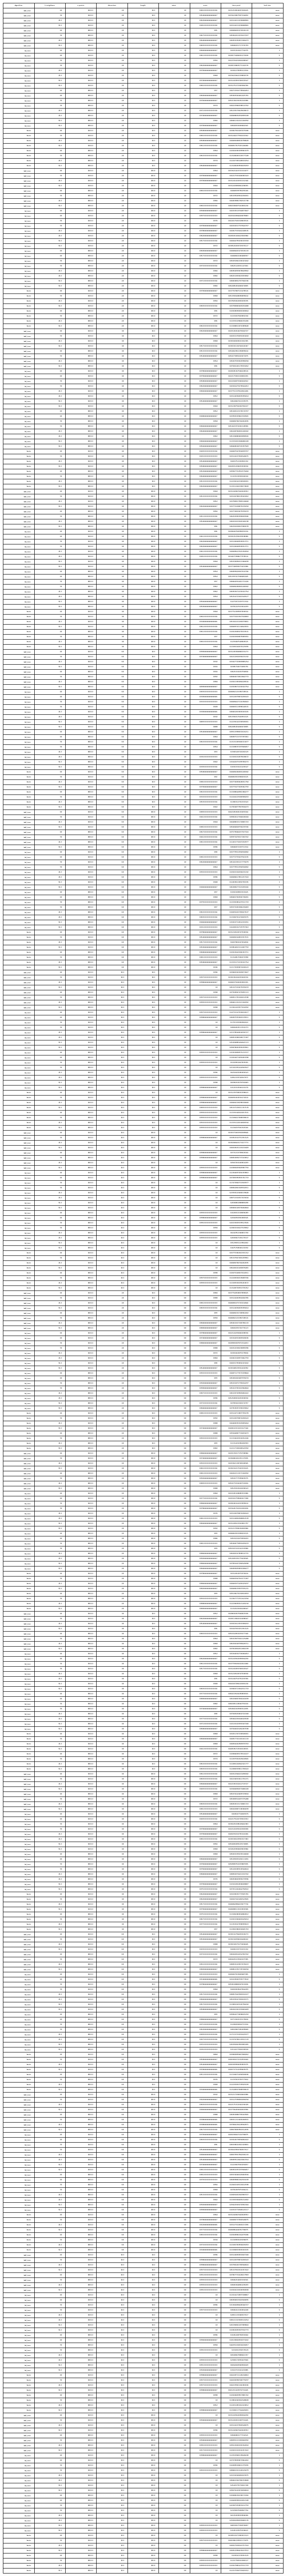

In [8]:
df_to_pdf(df_cube, "df_checkerboard")

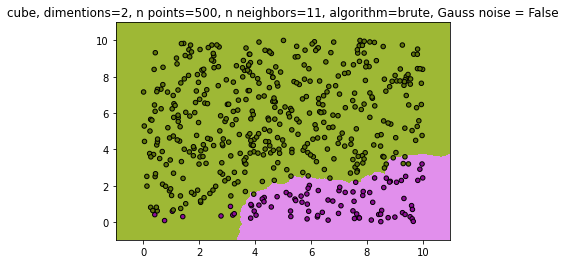

In [9]:
A, z = generate_cube_space(2, 500, 10, 0.5, False)
h = .01
X = A.T
cmap_light = ListedColormap(['#86a702', '#da73e8'])
cmap_bold = ListedColormap(['#60760a', '#8d0d96'])

X_train, X_test, y_train, y_test = train_test_split(X, z, test_size=0.5, train_size=0.5)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

neigh = KNeighborsClassifier(n_neighbors=11, algorithm = "brute")
neigh.fit(X_train, y_train)
score = neigh.score(X_test, y_test)
Z = neigh.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light, alpha=.8, shading='auto')
plt.scatter(X[:, 0], X[:, 1], c=z, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("cube, dimentions=2, n points=500, n neighbors=11, algorithm=brute, Gauss noise = False")
plt.show()

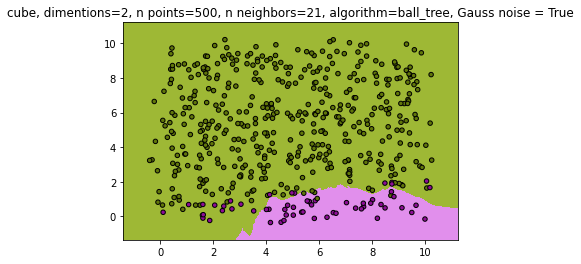

In [10]:
A, z = generate_cube_space(2, 500, 10, 0.5, True)
h = .01
X = A.T
cmap_light = ListedColormap(['#86a702', '#da73e8'])
cmap_bold = ListedColormap(['#60760a', '#8d0d96'])

X_train, X_test, y_train, y_test = train_test_split(X, z, test_size=0.5, train_size=0.5)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

neigh = KNeighborsClassifier(n_neighbors=21, algorithm = "ball_tree")
neigh.fit(X_train, y_train)
score = neigh.score(X_test, y_test)
Z = neigh.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light, alpha=.8, shading='auto')
plt.scatter(X[:, 0], X[:, 1], c=z, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("cube, dimentions=2, n points=500, n neighbors=21, algorithm=ball_tree, Gauss noise = True")
plt.show()

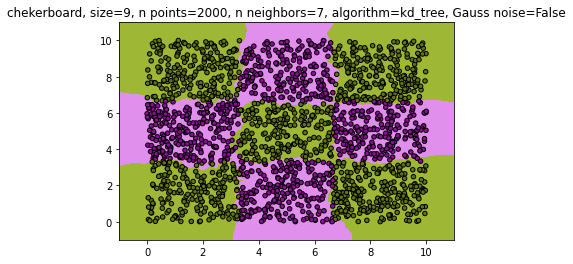

In [11]:
A, z = generate_checkerboard_space(9, 2000, 10, False)
h = .01
X = A.T
cmap_light = ListedColormap(['#86a702', '#da73e8'])
cmap_bold = ListedColormap(['#60760a', '#8d0d96'])

X_train, X_test, y_train, y_test = train_test_split(X, z, test_size=0.5, train_size=0.5)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

neigh = KNeighborsClassifier(n_neighbors=7, algorithm = "kd_tree")
neigh.fit(X_train, y_train)
score = neigh.score(X_test, y_test)
Z = neigh.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light, alpha=.8, shading='auto')
plt.scatter(X[:, 0], X[:, 1], c=z, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("chekerboard, size=9, n points=2000, n neighbors=7, algorithm=kd_tree, Gauss noise=False")
plt.show()

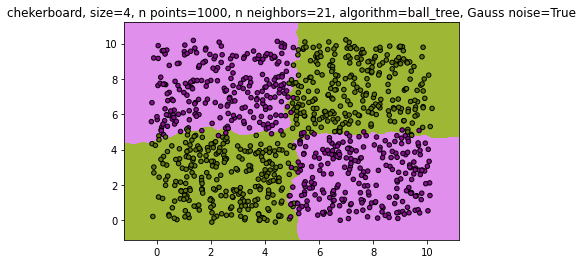

In [12]:
A, z = generate_checkerboard_space(4, 1000, 10, True)
h = .01
X = A.T
cmap_light = ListedColormap(['#86a702', '#da73e8'])
cmap_bold = ListedColormap(['#60760a', '#8d0d96'])

X_train, X_test, y_train, y_test = train_test_split(X, z, test_size=0.5, train_size=0.5)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

neigh = KNeighborsClassifier(n_neighbors=21, algorithm = "ball_tree")
neigh.fit(X_train, y_train)
score = neigh.score(X_test, y_test)
Z = neigh.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light, alpha=.8, shading='auto')
plt.scatter(X[:, 0], X[:, 1], c=z, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("chekerboard, size=4, n points=1000, n neighbors=21, algorithm=ball_tree, Gauss noise=True")
plt.show()